In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [4]:
y = iris.petal_width
x1 = iris.petal_length
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

*Simple linear model*

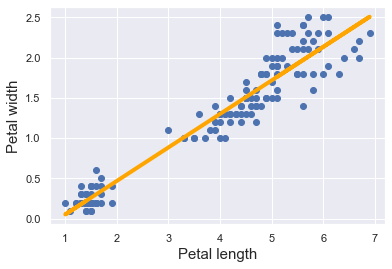

In [5]:
#visualiaze
plt.scatter(x1, y)
#numbers for yhat line are from the results.summary(), coef: const and petal_length
yhat = 0.4158*x1 - 0.3631
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Petal length', fontsize = 15)
plt.ylabel('Petal width', fontsize = 15)
plt.show()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           4.68e-86
Time:                        09:16:05   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.927   
Dependent Variable: petal_width      AIC:                -45.5911
Date:               2022-11-03 09:16 BIC:                -39.5698
No. Observations:   150              Log-Likelihood:     24.796  
Df Model:           1                F-statistic:        1882.   
Df Residuals:       148              Prob (F-statistic): 4.68e-86
R-squared:          0.927            Scale:              0.042636
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         -0.3631    0.0398  -9.1312  0.0000  -0.4417  -0.2845
petal_length   0.4158    0.0096  43.3872  0.0000   0.3968   0.4347
-----------------------------------------------------------------
Omnibus:              5.765        Durbin-Watson:           1.455
Prob(Omnibus):        0.056        Jarque-Bera (JB):        5.555
Skew:                 0.359        Prob(JB):                0.062
Kurtosis:             3.611        Condition No.:           10   
=================================================================

"""

From Hands-on ML

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
#sns.set()

In [23]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
x = sm.add_constant(X)

##coefficients for the regression line are taken from the OLS summary table
coef_x1 = 6.779e-05 
coef_const = 3.7490
yhat = x * coef_x1 + coef_const

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


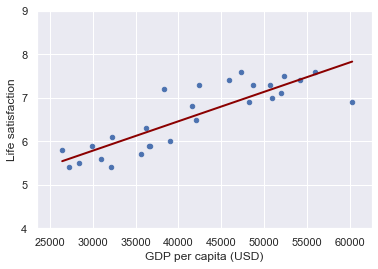

In [24]:
# Visualize the data

lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.plot(X, yhat, lw=2, color='#8b0000', label='regression line')
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [11]:
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # output: [[6.30165767]]

[[6.30165767]]


In [12]:
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     66.66
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.62e-08
Time:                        09:16:06   Log-Likelihood:                -13.051
No. Observations:                  27   AIC:                             30.10
Df Residuals:                      25   BIC:                             32.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7490      0.354     10.593      0.000       3.020       4.478
x1          6.779e-05    8.3e-06      8.165      0.000    5.07e-05    8.49e-05
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.059
Skew:                           0.111   Prob(JB):                        0.971
Kurtosis:                       3.049   Cond. No.                     1.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.score(X, y)

0.7272610933272652

In [17]:
model.coef_ ##matching coef from statmodel

array([[6.77889969e-05]])

In [18]:
model.intercept_ #matching constant from statmodel

array([3.74904943])